#  CLASSIFICATION MODEL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('rain.csv')
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.shape

(8425, 23)

In [6]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of             Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     Wi

In [5]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
# TO FIND NULL VALUES
df.isnull().sum()


Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

                 #    REPLACE NULL VALUES IN OBJECTIVE COLUMN

In [9]:
df['RainToday'].fillna(df['RainToday'].mode()[0],inplace=True) 

In [10]:
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0],inplace=True) 

In [11]:
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0],inplace=True)

In [12]:
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0],inplace=True)

In [ ]:
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0],inplace=True)

                 #  REPLACE NULL VALUES IN FLOATED COLUMN


In [19]:
df['MinTemp'].fillna(df['MinTemp'].mean(),inplace=True)

In [20]:
df['MaxTemp'].fillna(df['MaxTemp'].mean(),inplace=True)

In [21]:
df['Rainfall'].fillna(df['Rainfall'].mean(),inplace=True)

In [22]:
df['Evaporation'].fillna(df['Evaporation'].mean(),inplace=True)

In [23]:
df['Sunshine'].fillna(df['Sunshine'].mean(),inplace=True)

In [24]:
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(),inplace=True)

In [26]:
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(),inplace=True)

In [27]:
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean(),inplace=True)

In [28]:
df['Humidity9am'].fillna(df['Humidity9am'].mean(),inplace=True)

In [29]:
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(),inplace=True)

In [30]:
df['Pressure9am'].fillna(df['Pressure9am'].mean(),inplace=True)

In [31]:
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(),inplace=True)

In [32]:
df['Cloud9am'].fillna(df['Cloud9am'].mean(),inplace=True)

In [33]:
df['Cloud3pm'].fillna(df['Cloud3pm'].mean(),inplace=True)

In [35]:
df['Temp9am'].fillna(df['Temp9am'].mean(),inplace=True)

In [36]:
df['Temp3pm'].fillna(df['Temp3pm'].mean(),inplace=True)

In [37]:
#  AGAIN CHECK IS THERE IS ANY NULL VALUE 

df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow     239
dtype: int64

In [40]:
    #  NOW THERE IS NULL IN ONE COLUME  SO WE DROP THE NULL VALUES IN TARGET COLUMN

df=df.dropna()
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2017-06-20,Uluru,3.5,21.8,0.0,5.389395,7.632205,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,4.566622,4.503183,9.4,20.9,No,No
8420,2017-06-21,Uluru,2.8,23.4,0.0,5.389395,7.632205,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,5.389395,7.632205,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,5.389395,7.632205,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No


In [42]:
#  AGAIN CHECK IS THERE IS ANY NULL VALUE
df.isnull().sum()


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

 # STATISTICAL ANALYSIS

In [43]:

# DESCRIBE THE DATA SET

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000
mean,13.149120,23.842414,2.802496,5.402473,7.662491,40.055738,13.787510,18.475922,67.742388,51.178198,1017.701061,1015.293983,4.538863,4.488874,17.745033,22.431249
std,5.400423,6.106008,10.416563,3.881627,2.815977,13.755823,10.122016,9.732616,16.801755,18.332760,6.270735,6.205924,2.444436,2.310391,5.613107,5.934444
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.100000,1011.500000,3.000000,3.000000,13.800000,18.100000
50%,13.200000,23.200000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,21.900000
75%,17.300000,28.000000,1.200000,5.389395,9.000000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.400000,1018.900000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,61.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


               if there is difference between mean and median then possibility for presence of ' skewness
               if there is difference between max and 75% then posibility for presence of "outliers"


MinTemp             Axes(0.125,0.712609;0.168478x0.167391)
MaxTemp          Axes(0.327174,0.712609;0.168478x0.167391)
Rainfall         Axes(0.529348,0.712609;0.168478x0.167391)
Evaporation      Axes(0.731522,0.712609;0.168478x0.167391)
Sunshine            Axes(0.125,0.511739;0.168478x0.167391)
WindGustSpeed    Axes(0.327174,0.511739;0.168478x0.167391)
WindSpeed9am     Axes(0.529348,0.511739;0.168478x0.167391)
WindSpeed3pm     Axes(0.731522,0.511739;0.168478x0.167391)
Humidity9am          Axes(0.125,0.31087;0.168478x0.167391)
Humidity3pm       Axes(0.327174,0.31087;0.168478x0.167391)
Pressure9am       Axes(0.529348,0.31087;0.168478x0.167391)
Pressure3pm       Axes(0.731522,0.31087;0.168478x0.167391)
Cloud9am                Axes(0.125,0.11;0.168478x0.167391)
Cloud3pm             Axes(0.327174,0.11;0.168478x0.167391)
Temp9am              Axes(0.529348,0.11;0.168478x0.167391)
Temp3pm              Axes(0.731522,0.11;0.168478x0.167391)
dtype: object

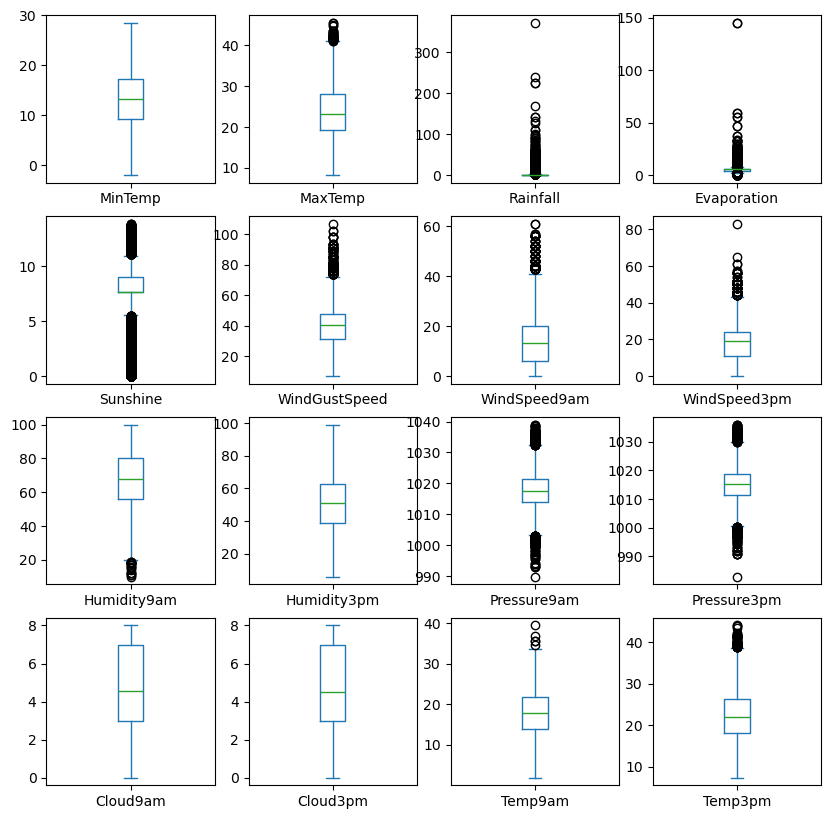

In [44]:
     # CHECKING FOR OUTLIERS

df.plot(kind='box',subplots=True,figsize=(10,10),layout=(4,4))

              Outliers in each column so we need to remove the ' outliers'from the columns

In [45]:
from scipy.stats import zscore
a=df[['MaxTemp']]
z=np.abs(zscore(a))
z

,MaxTemp
0,0.154351
1,0.205971
2,0.304241
3,0.680942
4,1.385210
...,...
8419,0.334513
8420,0.072460
8421,0.238728
8422,0.500781


In [46]:
print(np.where(z>3))

(array([  43,   59,   60,   61,   66,   67,  403,  404,  405, 2501, 3213,
       3226, 3237, 4024, 4037, 4048, 4509, 5260, 7745, 7746], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64))


In [48]:
from scipy.stats import zscore
a=df[['Rainfall']]
z=np.abs(zscore(a))
z

,Rainfall
0,0.211455
1,0.269059
2,0.269059
3,0.269059
4,0.173052
...,...
8419,0.269059
8420,0.269059
8421,0.269059
8422,0.269059


In [49]:
print(np.where(z>3))

(array([ 429,  455,  690,  704,  761,  787,  788,  793,  925,  939,  969,
        970,  998,  999, 1001, 1128, 1138, 1139, 1141, 1192, 1193, 1227,
       1231, 1254, 1255, 1347, 1401, 1402, 1403, 1469, 1470, 1471, 1503,
       1651, 1663, 1670, 1764, 1802, 1856, 2090, 2098, 2177, 2207, 2241,
       2405, 2463, 2515, 2567, 2650, 2651, 2708, 2815, 2856, 2864, 2866,
       2867, 2875, 2966, 3012, 3189, 3285, 3354, 3356, 3365, 3382, 3504,
       3540, 3553, 3626, 3667, 3675, 3677, 3678, 3686, 3777, 3823, 4000,
       4096, 4165, 4167, 4176, 4193, 4315, 4351, 4364, 4459, 4541, 4564,
       4802, 4899, 5077, 5117, 5129, 5210, 5292, 5315, 5553, 5650, 5828,
       5868, 5880, 5920, 5953, 6208, 6247, 6248, 6256, 6286, 6349, 6350,
       6873, 6931, 7044, 7589, 7619, 7862, 7898, 7906, 7907, 7947],
      dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [53]:
from scipy.stats import zscore
a=df[['Evaporation']]
z=np.abs(zscore(a))
z

,Evaporation
0,0.003369
1,0.003369
2,0.003369
3,0.003369
4,0.003369
...,...
8419,0.003369
8420,0.003369
8421,0.003369
8422,0.003369


In [54]:
print(np.where(z>3))

(array([2798, 2806, 2815, 2821, 2829, 2835, 2843, 2849, 2857, 2863, 2871,
       2877, 2885, 2891, 2899, 2905, 2913, 2919, 2927, 2933, 2938, 2952,
       3062, 3111, 3118, 3125, 3133, 3139, 3146, 3167, 3172, 3180, 3186,
       3189, 3195, 3609, 3617, 3626, 3632, 3640, 3646, 3654, 3660, 3668,
       3674, 3682, 3688, 3696, 3702, 3710, 3716, 3724, 3730, 3738, 3744,
       3749, 3763, 3873, 3922, 3929, 3936, 3944, 3950, 3957, 3978, 3983,
       3991, 3997, 4000, 4006, 4510, 5158, 5261, 5909, 6615, 6628, 6642,
       6648, 6669, 6680, 6687, 6692], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [56]:
from scipy.stats import zscore
a=df[['Sunshine']]
z=np.abs(zscore(a))
z

,Sunshine
0,0.010756
1,0.010756
2,0.010756
3,0.010756
4,0.010756
...,...
8419,0.010756
8420,0.010756
8421,0.010756
8422,0.010756


In [57]:
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [59]:
from scipy.stats import zscore
a=df[['WindGustSpeed']]
z=np.abs(zscore(a))
z

,WindGustSpeed
0,0.286752
1,0.286752
2,0.432153
3,1.167267
4,0.068649
...,...
8419,0.658361
8420,0.658361
8421,1.312669
8422,0.222155


In [60]:
print(np.where(z>3))

(array([  51,   61,  122,  266,  379,  555,  970, 2475, 3027, 3028, 3031,
       3043, 3050, 3060, 3382, 3383, 3424, 3535, 3536, 3838, 3839, 3842,
       3854, 3861, 3871, 4193, 4194, 4235, 4346, 4347, 4457, 4563, 4666,
       4724, 4728, 4746, 5051, 5067, 5208, 5314, 5417, 5475, 5479, 5497,
       5802, 5818, 6614, 6722, 7065, 7224, 7327, 7395, 7634, 7907],
      dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [62]:
from scipy.stats import zscore
a=df[['WindSpeed9am']]
z=np.abs(zscore(a))
z

,WindSpeed9am
0,0.613798
1,0.967012
2,0.514997
3,0.275408
4,0.670610
...,...
8419,0.119795
8420,0.077806
8421,0.077806
8422,0.473009


In [63]:
print(np.where(z>3))

(array([ 970, 1525, 1886, 1928, 1999, 2056, 2164, 2195, 3028, 3029, 3043,
       3050, 3490, 3839, 3840, 3854, 3861, 4301, 4426, 4529, 4548, 4622,
       4724, 4750, 4783, 4809, 4825, 4847, 4870, 4921, 5024, 5044, 5051,
       5064, 5067, 5070, 5074, 5075, 5076, 5092, 5102, 5118, 5144, 5154,
       5157, 5158, 5177, 5280, 5299, 5373, 5475, 5501, 5534, 5560, 5576,
       5598, 5621, 5672, 5775, 5795, 5802, 5815, 5818, 5821, 5825, 5826,
       5827, 5843, 5853, 5869, 5895, 5905, 5908, 5909], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [64]:
from scipy.stats import zscore
a=df[['WindSpeed3pm']]
z=np.abs(zscore(a))
z

,WindSpeed3pm
0,0.567619
1,0.362112
2,0.773126
3,0.973685
4,0.156605
...,...
8419,0.562671
8420,0.768178
8421,0.973685
8422,0.973685


In [65]:
print(np.where(z>3))

(array([  51,  379, 1179, 1577, 1634, 1655, 1881, 2011, 2026, 2195, 2206,
       3028, 3043, 3060, 3102, 3114, 3133, 3171, 3391, 3404, 3549, 3839,
       3854, 3871, 3913, 3925, 3944, 3982, 4202, 4215, 4360, 4689, 4734,
       4745, 4777, 5065, 5070, 5075, 5440, 5485, 5496, 5528, 5816, 5821,
       5826, 6924, 7395], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64))


In [66]:
from scipy.stats import zscore
a=df[['Humidity9am']]
z=np.abs(zscore(a))
z

,Humidity9am
0,0.193897
1,1.413176
2,1.770303
3,1.353655
4,0.848631
...,...
8419,0.520358
8420,0.996527
8421,0.698921
8422,0.877485


In [67]:
print(np.where(z>3))

(array([6614, 6626, 6629, 6651, 6668, 6695, 6696, 7128, 7164, 7337, 7364,
       7746], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [70]:
from scipy.stats import zscore
a=df[['Pressure9am']]
z=np.abs(zscore(a))
z

,Pressure9am
0,1.594976
1,1.132482
2,1.610924
3,0.016117
4,1.100586
...,...
8419,1.116196
8420,1.100248
8421,0.924819
8422,0.526117


In [71]:
print(np.where(z>3))

(array([  12,  294,  560,  561,  674,  739, 3020, 3021, 3382, 3383, 3831,
       3832, 4193, 4194, 4419, 4459, 4569, 4671, 4745, 4786, 4851, 4998,
       5010, 5041, 5077, 5170, 5210, 5320, 5422, 5496, 5537, 5602, 5749,
       5761, 5792, 5828, 6552, 6560, 6740, 6948, 6949, 6950, 7224, 7497],
      dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64))


In [72]:
from scipy.stats import zscore
a=df[['Pressure3pm']]
z=np.abs(zscore(a))
z

,Pressure3pm
0,1.320429
1,1.207627
2,1.062595
3,0.401896
4,1.497690
...,...
8419,0.951732
8420,0.806701
8421,0.613325
8422,0.242689


In [73]:
print(np.where(z>3))

(array([  12,  560,  594,  674,  739, 3012, 3019, 3020, 3128, 3171, 3238,
       3382, 3823, 3830, 3831, 3939, 3982, 4049, 4193, 4419, 4569, 4670,
       4671, 4705, 4745, 4786, 4851, 5040, 5041, 5077, 5170, 5320, 5421,
       5422, 5456, 5496, 5537, 5602, 5791, 5792, 5828, 6524, 6552, 6559,
       6560, 6949, 7395, 7497], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64))


In [74]:
from scipy.stats import zscore
a=df[['Temp9am']]
z=np.abs(zscore(a))
z

,Temp9am
0,0.150556
1,0.097106
2,0.579922
3,0.063243
4,0.009793
...,...
8419,1.486796
8420,1.362080
8421,1.219548
8422,0.934483


In [75]:
print(np.where(z>3))

(array([3213, 4024, 6755, 7746], dtype=int64), array([0, 0, 0, 0], dtype=int64))


In [76]:
from scipy.stats import zscore
a=df[['Temp3pm']]
z=np.abs(zscore(a))
z

,Temp3pm
0,0.106377
1,0.314918
2,0.129548
3,0.685658
4,1.224916
...,...
8419,0.258043
8420,0.005266
8421,0.348622
8422,0.618251


In [77]:
print(np.where(z>3))

(array([  43,   59,   60,   61,   66,   67,  403,  404,  405, 2501, 2825,
       3206, 3226, 3237, 3636, 4017, 4037, 4048, 4509, 5260, 7088, 7133,
       7745], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64))


                         # REMOVEING ALL OUTLIERS:

In [79]:
ds=df[(z<3).all(axis=1)]
ds

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2017-06-20,Uluru,3.5,21.8,0.0,5.389395,7.632205,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,4.566622,4.503183,9.4,20.9,No,No
8420,2017-06-21,Uluru,2.8,23.4,0.0,5.389395,7.632205,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,5.389395,7.632205,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,5.389395,7.632205,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No


                         # CHECKING FOE SKEWNESS for only ' Numerical column'

In [80]:
ds.select_dtypes(include=['number']).skew()

MinTemp          -0.076430
MaxTemp           0.344831
Rainfall         13.143295
Evaporation      14.119570
Sunshine         -0.717866
WindGustSpeed     0.743867
WindSpeed9am      0.939469
WindSpeed3pm      0.505044
Humidity9am      -0.255886
Humidity3pm       0.131029
Pressure9am      -0.028821
Pressure3pm      -0.010192
Cloud9am         -0.353112
Cloud3pm         -0.271074
Temp9am          -0.015643
Temp3pm           0.348074
dtype: float64

In [81]:
cat_col=[]
num_col=[]
for i in ds.dtypes.index:
    if ds.dtypes[i]=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print(cat_col)
print(num_col)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


               #  Label Encoding Technique for only "categorical columns"

In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_col:
    ds[i]=le.fit_transform(ds[i].astype(str))
ds

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.9,0.6,5.389395,7.632205,5,44.0,5,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,1,7.4,25.1,0.0,5.389395,7.632205,6,44.0,12,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,1112,1,12.9,25.7,0.0,5.389395,7.632205,7,46.0,5,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,2185,1,9.2,28.0,0.0,5.389395,7.632205,10,24.0,15,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,2296,1,17.5,32.3,1.0,5.389395,7.632205,5,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2175,11,3.5,21.8,0.0,5.389395,7.632205,0,31.0,8,...,59.0,27.0,1024.7,1021.2,4.566622,4.503183,9.4,20.9,0,0
8420,2176,11,2.8,23.4,0.0,5.389395,7.632205,0,31.0,15,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,2177,11,3.6,25.3,0.0,5.389395,7.632205,12,22.0,15,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,2178,11,5.4,26.9,0.0,5.389395,7.632205,9,37.0,15,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0


In [84]:
ds.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

              #  In this dats det 'loan status' is the target value = y
              #  other columns are independent variales =x

In [85]:
     # Now It shows only the input columns

x=ds.drop('RainTomorrow',axis=1)
y=ds['RainTomorrow']
print(x)

      Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        0         1     13.4     22.9       0.6     5.389395  7.632205   
1        1         1      7.4     25.1       0.0     5.389395  7.632205   
2     1112         1     12.9     25.7       0.0     5.389395  7.632205   
3     2185         1      9.2     28.0       0.0     5.389395  7.632205   
4     2296         1     17.5     32.3       1.0     5.389395  7.632205   
...    ...       ...      ...      ...       ...          ...       ...   
8419  2175        11      3.5     21.8       0.0     5.389395  7.632205   
8420  2176        11      2.8     23.4       0.0     5.389395  7.632205   
8421  2177        11      3.6     25.3       0.0     5.389395  7.632205   
8422  2178        11      5.4     26.9       0.0     5.389395  7.632205   
8423  2180        11      7.8     27.0       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  ...  WindSpeed3pm  Humidity9am  \
0               5  

In [86]:
# NOW IT SHOW ONLY THE TARGET COLUMN

print(y)

0       0
1       0
2       0
3       0
4       0
       ..
8419    0
8420    0
8421    0
8422    0
8423    0
Name: RainTomorrow, Length: 8163, dtype: int32


  # SCALING TO REMOVE BIASNESS FOR INPUT VARIABLES ( STANDAED SCALING )

In [87]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-1.75708657, -1.42606811,  0.05126102, ..., -0.14568258,
        -0.09855412, -0.56192884],
       [-1.75599456, -1.42606811, -1.0629539 , ..., -0.09200947,
         0.32859693, -0.56192884],
       [-0.54276715, -1.42606811, -0.04159022, ...,  0.58784991,
         0.14065047, -0.56192884],
       ...,
       [ 0.62022762,  1.72338105, -1.76862335, ..., -1.21914477,
         0.36276901, -0.56192884],
       [ 0.62131964,  1.72338105, -1.43435887, ..., -0.93288819,
         0.63614569, -0.56192884],
       [ 0.62350367,  1.72338105, -0.9886729 , ..., -0.46772124,
         0.61905964, -0.56192884]])

In [88]:
# It shows the whole number of all column
ds

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.9,0.6,5.389395,7.632205,5,44.0,5,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,1,7.4,25.1,0.0,5.389395,7.632205,6,44.0,12,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,1112,1,12.9,25.7,0.0,5.389395,7.632205,7,46.0,5,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,2185,1,9.2,28.0,0.0,5.389395,7.632205,10,24.0,15,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,2296,1,17.5,32.3,1.0,5.389395,7.632205,5,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2175,11,3.5,21.8,0.0,5.389395,7.632205,0,31.0,8,...,59.0,27.0,1024.7,1021.2,4.566622,4.503183,9.4,20.9,0,0
8420,2176,11,2.8,23.4,0.0,5.389395,7.632205,0,31.0,15,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,2177,11,3.6,25.3,0.0,5.389395,7.632205,12,22.0,15,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,2178,11,5.4,26.9,0.0,5.389395,7.632205,9,37.0,15,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0


In [89]:
                #  IT SHOW FLOAT NUMBERS OF ALL COLUMN
         #In the BELOW data set all values in between the -3 to +3 (z score)
x=pd.DataFrame(data=x)
x

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.757087,-1.426068,0.051261,-0.147400,-0.211934,-0.002057,-0.009855,-0.539638,0.290055,-0.638487,...,0.568942,0.190901,-1.605038,-1.599885,-1.327248,1.414429,0.005067,-0.145683,-0.098554,-0.561929
1,-1.755995,-1.426068,-1.062954,0.217476,-0.269462,-0.002057,-0.009855,-0.312807,0.290055,0.996311,...,0.363293,-1.418521,-1.440612,-1.136918,-1.214213,0.010392,0.005067,-0.092009,0.328597,-0.561929
2,-0.542767,-1.426068,-0.041590,0.316988,-0.269462,-0.002057,-0.009855,-0.085975,0.435682,-0.638487,...,0.774590,-1.776170,-1.166569,-1.615849,-1.068882,0.010392,-1.077992,0.587850,0.140650,-0.561929
3,0.628964,-1.426068,-0.728689,0.698449,-0.269462,-0.002057,-0.009855,0.594519,-1.166210,1.696939,...,-0.973421,-1.358913,-1.933889,-0.019413,-0.406818,0.010392,0.005067,0.069010,0.704490,-0.561929
4,0.750177,-1.426068,0.812641,1.411616,-0.173581,-0.002057,-0.009855,-0.539638,0.071616,-1.572658,...,0.157645,0.846592,-1.002143,-1.104989,-1.504875,1.005492,1.518045,0.015337,1.251243,-0.561929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8158,0.618044,1.723381,-1.787194,-0.329838,-0.269462,-0.002057,-0.009855,-1.673795,-0.656517,0.062141,...,-0.562124,-0.524397,-1.330995,1.114056,0.949607,0.010392,0.005067,-1.487510,-0.252329,-0.561929
8159,0.619136,1.723381,-1.917185,-0.064474,-0.269462,-0.002057,-0.009855,-1.673795,-0.656517,1.696939,...,-0.767773,-1.001263,-1.495421,1.098092,0.804276,0.010392,0.005067,-1.362273,0.003962,-0.561929
8160,0.620228,1.723381,-1.768623,0.250646,-0.269462,-0.002057,-0.009855,1.048182,-1.311836,1.696939,...,-0.973421,-0.703222,-1.659846,0.922484,0.610501,0.010392,0.005067,-1.219145,0.362769,-0.561929
8161,0.621320,1.723381,-1.434359,0.516011,-0.269462,-0.002057,-0.009855,0.367687,-0.219637,1.696939,...,-0.973421,-0.882047,-1.495421,0.523375,0.239099,0.010392,0.005067,-0.932888,0.636146,-0.561929


In [90]:
                   # NOW  TAKE THE VALUE COUNT FOR Y ( TARGET VALUE)

y.value_counts()

RainTomorrow
0    6175
1    1988
Name: count, dtype: int64

               NOW WE NEED TO BALANCE THE DATA SET BY USING SMOTE

In [91]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)
y.value_counts()

RainTomorrow
0    6175
1    6175
Name: count, dtype: int64

                #  NOW THE DATA SET IS BALANCED BY USING SMOTE

# NOW WE CAN SPLIT THE DATA SET INTO TRAIN ANS TEST


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score, KFold

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [106]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8645, 22)
(8645,)
(3705, 22)
(3705,)


                       LOGISTIC REGREESION

In [107]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
testprediction=lr.predict(x_test)
print(accuracy_score(y_test,testprediction))
print(confusion_matrix(y_test,testprediction))
print(classification_report(y_test,testprediction))
Kfold=KFold(n_splits=5,shuffle=True)
score=cross_val_score(lr,x,y,cv=Kfold)
print(score)
print(score.mean())
print(((accuracy_score(y_test,testprediction))-score.mean()))


0.7765182186234818
[[1462  389]
 [ 439 1415]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1851
           1       0.78      0.76      0.77      1854

    accuracy                           0.78      3705
   macro avg       0.78      0.78      0.78      3705
weighted avg       0.78      0.78      0.78      3705

[0.78178138 0.76882591 0.78623482 0.77732794 0.78178138]
0.7791902834008099
-0.002672064777328065


             DESCRIPTION FOR CONFUSION MATRIX

1.TRUE POSITIVE (TP) = 1462 ( Actually it is True and ML also predicted it is True )

2.FALSE NEGATIVE (FN)= 389 ( Actually it is True but ML predicted it is False )

3.FALSE POSITIVE (FP)= 439 ( Actually it is False but ML predicted it is True )

4.TRUE NEGATIVE (TN) = 1415 ( Actually it is False and ML also predicted it is False )

